<a href="https://colab.research.google.com/github/naomideutsch/Deep_Prior/blob/master/deep_prior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 3.8MB 37.3MB/s 
     |████████████████████████████████| 512kB 39.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=163de30071ee945b57ba4c198c896ef96f115e8a620e6bfac1f218d848f5d862
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

In [2]:
!git clone https://github.com/naomideutsch/Deep_Prior

Cloning into 'Deep_Prior'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (406/406), done.
remote: Total 465 (delta 99), reused 407 (delta 52), pack-reused 0
Receiving objects: 100% (465/465), 30.35 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [3]:
cd Deep_Prior

/content/Deep_Prior


Super-Resolution

In [ ]:

!python super_resolution.py --lr-imgs-dir="dataset/lr_stylegan" --hr-imgs-dir="dataset/hr_stylegan" --latents-dir="dataset/latents_dir" --hr-img-size 256 256

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR = "dataset/hr_stylegan"
ORIG = "dataset/lr_stylegan"

images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR, name))
    display(img)
    orig = Image.open(os.path.join(ORIG, name))
    display(orig)

## [**StyleGan examples**]

Preprocessing blurred images

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="dataset/full_res/x_motion_blurred" --kernel-size=5 --sigma=2 --kernel-type="x_motion"

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="dataset/full_res/gauss_blurred_9_8" --kernel-size=9 --sigma=8 --kernel-type="gauss"

Display blurred images

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR = "dataset/full_res/gauss_blurred_9_8"
ORIG = "dataset/full_resolution_stylegan"
images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR, name))
    display(img)
    orig = Image.open(os.path.join(ORIG, name))

    display(orig)

In [12]:
!python deblurring.py --blurred-imgs-dir="dataset/full_res/gauss_blurred" --deblurred-imgs-dir="dataset/full_res/gauss_deblurred_9_8" --latents-dir="datasetfull_res/gauss_latents_dir_9_8" --kernel-size=9 --sigma=8 --beta=0.1 --reg="grad"




Using TensorFlow backend.



Traceback (most recent call last):
  File "deblurring.py", line 150, in <module>
    optimize_latent_codes(args)
  File "deblurring.py", line 53, in optimize_latent_codes
    with dnnlib.util.open_url(STYLEGAN_MODEL_URL, cache_dir=config.cache_dir) as f:
  File "stylegan/dnnlib/util.py", line 378, in open_url
    raise IOError("Google Drive quota exceeded")
OSError: Google Drive quota exceeded


In [7]:
ls

dataset/          inpainting.py        preprocessing/  super_resolution.py
deblurring.py     inversion.py         README.md
deep_prior.ipynb  perceptual_model.py  stylegan/


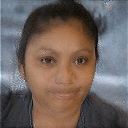

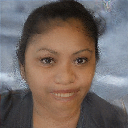

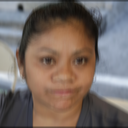

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR0 = "dataset/deblurred01"
DIR01 = "dataset/x_motion_deblurred01"


DIR = "dataset/deblurred"
ORIG = "dataset/x_motion_blurred"
images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR01, name))
    display(img)
    img = Image.open(os.path.join(DIR0, name))
    display(img)
    orig = Image.open(os.path.join(ORIG, name))

    display(orig)